<a href="https://colab.research.google.com/github/ifelsejet/pokeML/blob/main/PokeML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import sklearn
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from tensorflow.keras import layers
import sys
from google.colab import files
import imghdr
from sklearn.model_selection import train_test_split



Load Dataset From Google Drive

In [2]:
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# return number of folders in dataset
print(len(os.listdir('/content/drive/MyDrive/dataset')))
# return number of images in a folder
print(len(os.listdir('/content/drive/MyDrive/dataset/NidoranM')))

151
200


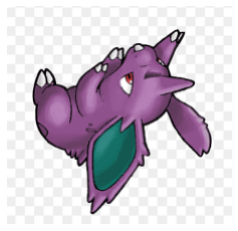

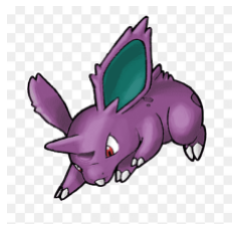

In [5]:

'''
with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt') # downloading files from Drive
'''
path = '/content/drive/MyDrive/dataset/NidoranM/'
imgTest = ''
for img in os.listdir(path):
  #print(img)
  imgTest = img
imgSaveTest = mpimg.imread(path+"/"+imgTest)
#print(imgSaveTest)
fig = plt.figure()
#plt.axis('off')
plt.axis("off")   # turns off axes
#plt.axis("tight")  # gets rid of white border
#plt.axis("image")  # square up the image instead of filling the "figure" space
#fig.axes.get_xaxis().set_visible(False)
#fig.axes.get_yaxis().set_visible(False)
#plt.subplot(n,n,1)
imgAlterTest = tf.image.flip_up_down(imgSaveTest)
plt.imshow(imgAlterTest)
#plt.savefig(path+"/"+ "imgAlterTestFlipUpDowAHHN.png",bbox_inches='tight',pad_inches = 0)
fig = plt.figure()
plt.axis("off") 
flippedLR = tf.image.flip_left_right(imgSaveTest)
plt.imshow(flippedLR)
#plt.savefig(path+"/"+ "imgAlterTestFlipLeftRight.png",bbox_inches='tight',pad_inches = 0)
#plt.savefig(path+"/"+ "imgAlterTestFlipUpDowN.png",bbox_inches='tight',pad_inches = 0)
#files.download(path+imgTest)




In [6]:
# Augment Data for each pokemon that has under 60 images
'''
data_augmentation = tf.keras.Sequential([
                            layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                            layers.experimental.preprocessing.RandomRotation((-0.2, 0.3))
])
path = '/content/drive/MyDrive/dataset/NidoranM'
#image, label = next(iter(os.listdir('/content/drive/MyDrive/dataset/NidoranM'))
n = 9
cnt = 0
#TODO: Iterate over all labels, then create 250x250 plt figures
#of all pokemons, then save it locally (Pokemon_AugmentType_CNT?.png)

for img in os.listdir(path):
  #print(img) 
  cnt += 1
  image = mpimg.imread(path+"/"+img)
  #print(image)
  fig = plt.figure()
  plt.subplot(n,n,1)
  plt.title('Original image')
  plt.imshow(image)

  plt.subplot(n,n,2)
  plt.title('Augmented image  (Left -> Right)')
  #plt.imshow(augmented)
  flippedLR = tf.image.flip_left_right(image)
  plt.imshow(flippedLR)
  plt.subplot(n,n,3)
  plt.title('Augmented image  (Up -> Down)')
  #plt.imshow(augmented)
  flippedUD = tf.image.flip_up_down(image)
  plt.imshow(flippedUD)
  plt.subplot(n,n,4)
  plt.title('Augmented image  (Rotate90)')
  #plt.imshow(augmented)
  rotated = tf.image.rot90(image)
  plt.imshow(rotated)
  plt.subplot(n,n,5)
  plt.title('Augmented image  (Rotate180)')
  #plt.imshow(augmented)
  rotated180 = tf.image.rot90(tf.image.rot90(image))
  plt.imshow(rotated180)
  plt.subplot(n,n,6)
  plt.title('Augmented image  (Rotate270)')
  #plt.imshow(augmented)
  rotated270 = tf.image.rot90(tf.image.rot90(tf.image.rot90(image)))
  plt.imshow(rotated270)
  plt.subplot(n,n,7)
  plt.title('Augmented image  (Rotate90 + Flip U/D)')
  #plt.imshow(augmented)
  rotateflipUD = tf.image.rot90(tf.image.flip_up_down(image))
  plt.imshow(rotateflipUD)
  plt.subplot(n,n,8)
  plt.title('Augmented image  (Rotate90 + Flip L/R)')
  #plt.imshow(augmented)
  rotateflip90LR = tf.image.rot90(tf.image.flip_left_right(image))
  plt.imshow(rotateflip90LR)
  plt.subplot(n,n,9)
  plt.title('Augmented image  (Flip L/R + U/D)')
  #plt.imshow(augmented)
  flipLRUD = tf.image.flip_left_right(tf.image.flip_up_down(image))
  plt.imshow(flipLRUD)
  #plt.savefig("Test Save " + str(cnt) + ".png")
  #visualize(image, flipped)
  #plt.figure(figsize = (10,10))
  #print(image)
  #plt.imshow(image)
  #plt.show()
#exampleImg = cv2.imread('/content/drive/MyDrive/dataset/NidoranM/nnnn.png')
#plt.imshow(exampleImg)
#plt.show()
'''

'\ndata_augmentation = tf.keras.Sequential([\n                            layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),\n                            layers.experimental.preprocessing.RandomRotation((-0.2, 0.3))\n])\npath = \'/content/drive/MyDrive/dataset/NidoranM\'\n#image, label = next(iter(os.listdir(\'/content/drive/MyDrive/dataset/NidoranM\'))\nn = 9\ncnt = 0\n#TODO: Iterate over all labels, then create 250x250 plt figures\n#of all pokemons, then save it locally (Pokemon_AugmentType_CNT?.png)\n\nfor img in os.listdir(path):\n  #print(img) \n  cnt += 1\n  image = mpimg.imread(path+"/"+img)\n  #print(image)\n  fig = plt.figure()\n  plt.subplot(n,n,1)\n  plt.title(\'Original image\')\n  plt.imshow(image)\n\n  plt.subplot(n,n,2)\n  plt.title(\'Augmented image  (Left -> Right)\')\n  #plt.imshow(augmented)\n  flippedLR = tf.image.flip_left_right(image)\n  plt.imshow(flippedLR)\n  plt.subplot(n,n,3)\n  plt.title(\'Augmented image  (Up -> Down)\')\n  #plt.imshow

Get labels (folder names)


In [7]:
labels = os.listdir('/content/drive/MyDrive/dataset')
print(labels)



['Wigglytuff', 'Weezing', 'Vileplume', 'Zapdos', 'Zubat', 'Weedle', 'Voltorb', 'Weepinbell', 'Wartortle', 'Vulpix', 'Venonat', 'Vaporeon', 'Tangela', 'Venomoth', 'Tauros', 'Victreebel', 'Staryu', 'Tentacruel', 'Venusaur', 'Tentacool', 'Seadra', 'Slowpoke', 'Slowbro', 'Snorlax', 'Shellder', 'Seaking', 'Spearow', 'Seel', 'Starmie', 'Squirtle', 'Scyther', 'Rapidash', 'Raichu', 'Rhydon', 'Rhyhorn', 'Sandshrew', 'Psyduck', 'Rattata', 'Raticate', 'Sandslash', 'Pidgey', 'Pinsir', 'Poliwrath', 'Ponyta', 'Primeape', 'Poliwag', 'Poliwhirl', 'Pikachu', 'Pidgeotto', 'Porygon', 'Persian', 'Oddish', 'Nidorino', 'Omastar', 'Parasect', 'Onix', 'Paras', 'Ninetales', 'Omanyte', 'Pidgeot', 'Nidoqueen', 'MrMime', 'Nidoking', 'Meowth', 'Moltres', 'Mew', 'Mewtwo', 'Nidorina', 'Muk', 'Metapod', 'Magikarp', 'Machamp', 'Machoke', 'Mankey', 'Magmar', 'Magneton', 'Machop', 'Magnemite', 'Lickitung', 'Marowak', 'Jynx', 'Kingler', 'Kakuna', 'Krabby', 'Koffing', 'Kabutops', 'Kabuto', 'Lapras', 'Kadabra', 'Kangaskhan

In [8]:
# iterate over all labels
# for each label, iterate over all images
# iterate all images in directory, then upload to google drive


# DONT RUN YET
upload = False # don't want to update images every time we run the notebook, set to False
dir = '/content/drive/MyDrive/dataset/'
labels = os.listdir(dir)
cnt = 0
if upload:
  for label in labels:
    path = dir+str(label)
    if len(os.listdir(path)) < 200: #only augment if less than 200 images total 
        for img in os.listdir(path):
          cnt +=1
          image = mpimg.imread(path+"/"+img)
          #print(imghdr.what(image)
          sample_str = str(path)+"/"+img
          last_chars = sample_str[-4:]
         # print(last_chars)
          if(len(image.shape)== 3 and (last_chars != ".svg") and len(os.listdir(path)) < 200):
            fig = plt.figure()
            plt.axis("off")
            print("Curr image: " + path+"/"+str(img))
            #print("Image shape", len(image.shape))
            imgAlterTest = tf.image.flip_up_down(image)
            plt.imshow(imgAlterTest)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"UD.png",bbox_inches='tight',pad_inches = 0)
            fig = plt.figure()
            plt.axis("off") 
            flippedLR = tf.image.flip_left_right(image)
            plt.imshow(flippedLR)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"LR.png",bbox_inches='tight',pad_inches = 0)
            fig = plt.figure()
            plt.axis("off")
            rotated = tf.image.rot90(image)
            plt.imshow(rotated)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"rot90.png",bbox_inches='tight',pad_inches = 0)
            fig = plt.figure()
            plt.axis("off") 
            rotated180 = tf.image.rot90(tf.image.rot90(image))
            plt.imshow(rotated180)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"rot180.png",bbox_inches='tight',pad_inches = 0)
            fig = plt.figure()
            plt.axis("off") 
            rotated270 = tf.image.rot90(tf.image.rot90(tf.image.rot90(image)))
            plt.imshow(rotated270)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"rot270.png",bbox_inches='tight',pad_inches = 0)
            fig = plt.figure()
            plt.axis("off") 
            rotateflipUD = tf.image.rot90(tf.image.flip_up_down(image))
            plt.imshow(rotateflipUD)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"rotUD.png",bbox_inches='tight',pad_inches = 0)
            fig = plt.figure()
            plt.axis("off") 
            rotateflip90LR = tf.image.rot90(tf.image.flip_left_right(image))
            plt.imshow(rotateflip90LR)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"rotLR.png",bbox_inches='tight',pad_inches = 0)
            fig = plt.figure()
            plt.axis("off") 
            flipLRUD = tf.image.flip_left_right(tf.image.flip_up_down(image))
            plt.imshow(flipLRUD)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"LRUD.png",bbox_inches='tight',pad_inches = 0)
  print("Finished augmenting: " + str(label))
      #print(str(label)+ str(cnt))


In [9]:
'''
# Check to see if each pokemon (label) has equal size
check = 0 # should be 150 post for loop
lowest = 1000000000
highest = 0
avg = 0
for label in labels:
  dir = '/content/drive/MyDrive/dataset/'
  dir+= str(label)
  #print(dir)
  count = len(os.listdir(dir))
  print("Pokemon & Count: ", label, count)
  check += 1
  avg += count
  lowest = min(lowest, count)
  highest = max(highest, count)
#print(check) # check if collected all 150 pokemon (actually 149?)
print("Lowest, Highest, Avg # of images", lowest, highest, round(avg/count))
'''

'\n# Check to see if each pokemon (label) has equal size\ncheck = 0 # should be 150 post for loop\nlowest = 1000000000\nhighest = 0\navg = 0\nfor label in labels:\n  dir = \'/content/drive/MyDrive/dataset/\'\n  dir+= str(label)\n  #print(dir)\n  count = len(os.listdir(dir))\n  print("Pokemon & Count: ", label, count)\n  check += 1\n  avg += count\n  lowest = min(lowest, count)\n  highest = max(highest, count)\n#print(check) # check if collected all 150 pokemon (actually 149?)\nprint("Lowest, Highest, Avg # of images", lowest, highest, round(avg/count))\n'

In [10]:
# Resize images to 150x150 (or play around w it, smaller images = less calculations) 
# Normalize pixel values
# Convert images to NumPy arrays (64x64)





In [11]:
# Shuffle only training dataset, then split into train, val and test (arrays)
# training is about 150 images per pokemon (assuming 200 images each, choosing a specific CNN arch) [aim for 70% acc on training]
# validation is about 40 images per pokemon (testing hyperparameters, increasing acc from training)
# test is about 10 images per pokemon

In [12]:
# show image grid & labels

In [13]:
# train model on training dataset

In [14]:
# tune hyperparameters w/ validation dataset 
# (play with parameters passed and see which give the best results)

In [15]:
# once ideal hyperparamters are found, pass in the testing dataset to model

In [16]:
# run classification report (skmetrics/tensorflow)

In [17]:
# show wrongly classified images